In [39]:
import pandas as pd

In [40]:
FILENAME_DEV = './data/dataset_conll/all.sentence.dev.txt'
FILENAME_TRAIN = './data/dataset_conll/all.sentence.train.txt'
FILENAME_TEST = './data/dataset_conll/all.sentence.test.txt'
FILES = [FILENAME_DEV, FILENAME_TRAIN, FILENAME_TEST]


In [41]:
dataframes = []
for filename in FILES:
    with open(filename, 'r') as f:
        lines = f.readlines()
        data = [line.strip() for line in lines]
        # get last word from each item as a label and match with data
        labeled_data = []
        for item in data:
            label = item.split()[-1]
            sentence_data = ' '.join(item.split()[:-1])
            labeled_data.append((sentence_data, label))

        # create a dataframe
        df = pd.DataFrame(labeled_data, columns=['sentence', 'label'])
        dataframes.append(df)

# merge all dataframes
df = pd.concat(dataframes)

In [42]:
df.head()

,sentence,label
0,Moim zdaniem jest wart jakieś 1100zł .,__label__z_minus_m
1,co jest masakra szczególnie jak na początku ch...,__label__z_minus_m
2,Poza tym krzesło ma bardzo duże luzy .,__label__z_minus_m
3,"Ścielenie łóżek , sprzątanie sal po organizowa...",__label__z_zero
4,Parę niższych osób siedziało i było im wygodnie .,__label__z_amb


In [43]:
labels = pd.DataFrame(df['label'].value_counts())
labels.head()

,label
__label__z_minus_m,21156
__label__z_plus_m,15324
__label__z_zero,14101
__label__z_amb,6885


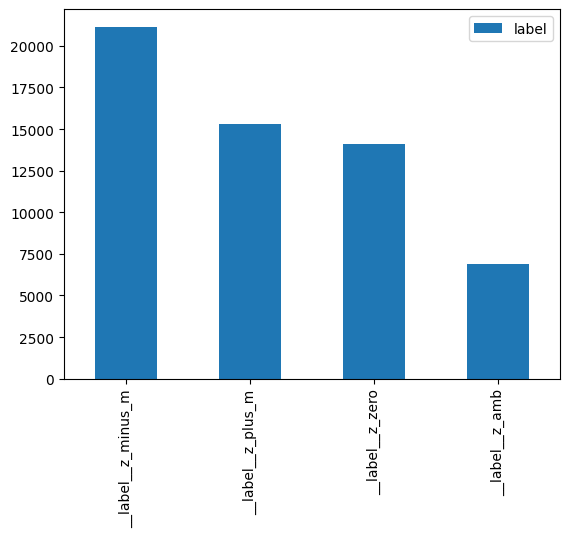

In [44]:
# display labels distribution
import matplotlib.pyplot as plt
labels.plot(kind='bar')
plt.show()


In [45]:
# find missing labels or sentences
missing_labels = df[df['label'].isnull()]
missing_labels.head()

,sentence,label


In [46]:
missing_sentences = df[df['sentence'].isnull()]
missing_sentences.head()


,sentence,label


In [47]:
# split data into train, test and validation
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)
train, validation = train_test_split(test, test_size=0.2, random_state=42)

In [60]:
# ensure that the distribution of labels is the same in all datasets
tr_c = train['label'].value_counts()
va_c = validation['label'].value_counts()
te_c = test['label'].value_counts()

# display ratio of labels in each dataset
tr_ratio = tr_c / tr_c.sum()
va_ratio = va_c / va_c.sum()
te_ratio = te_c / te_c.sum()

__label__z_minus_m    0.369671
__label__z_plus_m     0.268836
__label__z_zero       0.247346
__label__z_amb        0.114147
Name: label, dtype: float64

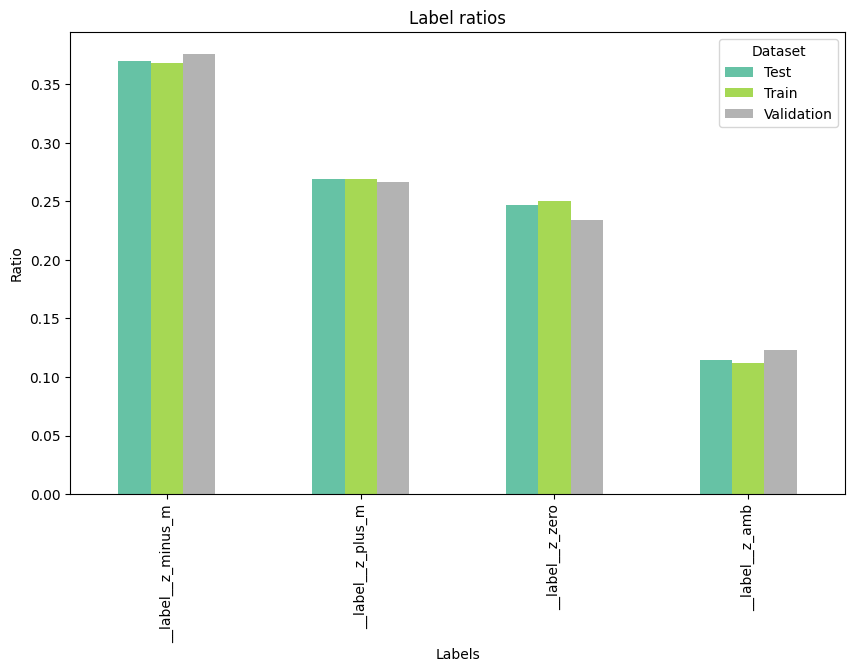

In [63]:
# Create a DataFrame to combine the ratios for comparison
df_ratios = pd.DataFrame({'Test': te_ratio, 'Train': tr_ratio, 'Validation': va_ratio})

# Plotting the bar chart to compare the ratios for different labels
df_ratios.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Label ratios')
plt.ylabel('Ratio')
plt.xlabel('Labels')
plt.legend(title='Dataset')
plt.show()

In [49]:
import os

# ensure directories exist
if not os.path.exists('./output'):
    os.makedirs('./output')

train.to_csv('./output/train.csv', index=False)
validation.to_csv('./output/validation.csv', index=False)
test.to_csv('./output/test.csv', index=False)